<a href="https://colab.research.google.com/github/thesupriyanagpal/Handwritten_Digit_Recognition_HDR/blob/main/Handwritten_Digit_Recognition_(HDR)_%5BMNIST%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition {HDR}

## Problem Statement:
------------------------

### Overview:

Handwritten Digit Recognition (HDR) is a fundamental problem in the field of computer vision, where the task is to accurately classify digit images {0 - 9} written by hand. This problem has a wide range of real - world applications, including postal code sorting, bank check processing, automatic form digitization, and license plate recognition. The challenge arises from the variability in human handwriting, which can differ greatly between individuals, making it difficult for traditional algorithms to classify digits with high accuracy.

This project aims to create a machine learning and deep learning-based system that can recognize and classify handwritten digits from images, using state-of-the-art techniques. The system must handle various handwriting styles and generalize well to unseen samples, making it robust enough for practical, real-time use.

### Objective:

The primary objective of the project is to build and deploy a model capable of accurately identifying handwritten digits from images. This involves:

1. Dataset Collection: Using a well-established dataset like the MNIST dataset, which consists of 70,000 labeled grayscale images of handwritten digits. Each image is a 28x28 pixel image with the corresponding label indicating the digit (0-9).
2. Data Preprocessing: Applying techniques to clean and standardize the images, ensuring consistency and improving model performance.
3. Feature Extraction: Extracting relevant features from the images using techniques such as pixel intensities or more advanced approaches like Histogram of Oriented Gradients (HOG).
4. Model Selection and Training: Implementing various machine learning and deep learning algorithms, such as Support Vector Machines (SVM), Random Forests, and Convolutional Neural Networks (CNNs), to classify the digits.
5. Model Evaluation: Assessing the model's performance using metrics like accuracy, confusion matrix, precision, and recall to ensure reliable digit classification.
6. Model Optimization: Fine-tuning hyperparameters and applying techniques to improve the model’s generalization to new, unseen data.
7. Real-World Deployment: Integrating the trained model into a real-time application capable of classifying handwritten digits in practical scenarios, such as web or mobile applications.

##### *Dataset Link:* [HDR {Handwritten Digit Recognition Set}](https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/)

### 1. Import Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import tensorflow as tf
tf.random.set_seed(42) # set the random seed for reproducibility

from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

### 2. Loading Data

In [2]:
# Loading Dataset

MNIST = tf.keras.datasets.mnist

# The dataset is already split into Train and Test sets

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# Printing the Shape of Data and Labels in Train and Test Sets

print("Training data shape:\n", X_train.shape)
print("Testing data shape:\n", X_test.shape)
print("Training labels shape:\n", Y_train.shape)
print("Testing labels shape:\n", Y_test.shape)

Training data shape:
 (60000, 28, 28)
Testing data shape:
 (10000, 28, 28)
Training labels shape:
 (60000,)
Testing labels shape:
 (10000,)


### 3. Preprocessing Data

In [5]:
# Sample Digit from Train Dataset

print(X_train[8])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  4

In [6]:
print(X_train[8].shape)

(28, 28)


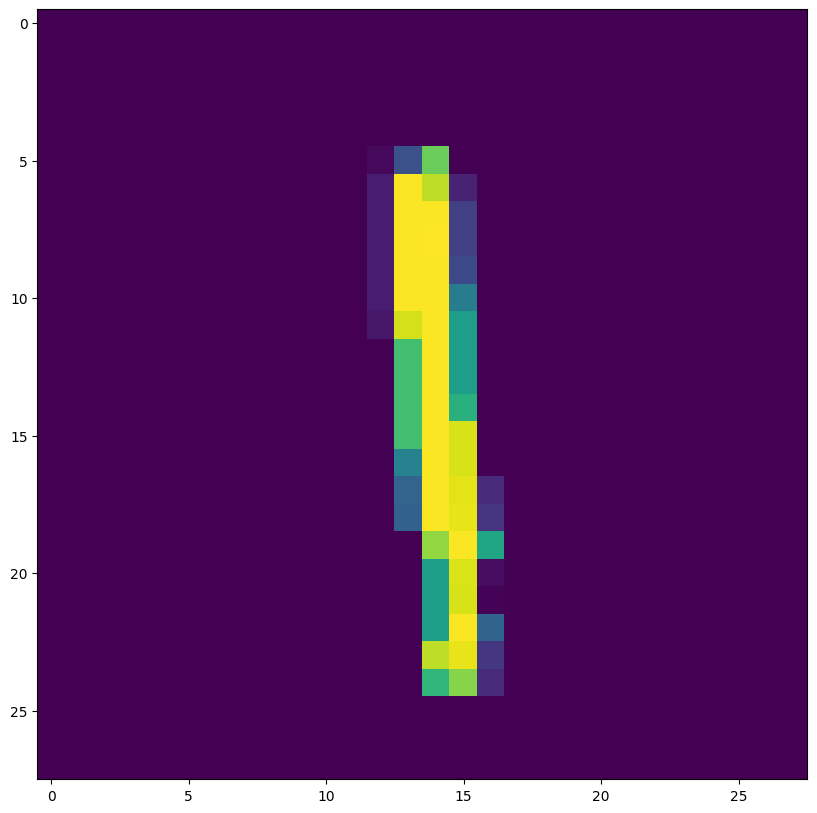

In [7]:
# Displaying the Sample Digit Image

plt.figure(figsize = (10, 10))
plt.imshow(X_train[8])
plt.show()

In [8]:
print(Y_train[8])

1


In [9]:
# Unique Labels in Train and Test Sets

print("Training labels:\n", np.unique(Y_train))
print("Testing labels:\n", np.unique(Y_test))

Training labels:
 [0 1 2 3 4 5 6 7 8 9]
Testing labels:
 [0 1 2 3 4 5 6 7 8 9]


In [10]:
# Normalize the values

X_train = X_train / 255
X_test = X_test / 255

In [11]:
print(X_train[8])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### 4. Build The Convolutional Neural Network (CNN) Model

In [12]:
# Setting the layers of neural network

Model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

# Compile the neural network

Model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Model.summary()

Model: "Sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Training the neural network

History = Model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 50, batch_size = 42)

Epoch 1/50
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8359 - loss: 0.5671 - val_accuracy: 0.9509 - val_loss: 0.1656
Epoch 2/50
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9555 - loss: 0.1536 - val_accuracy: 0.9624 - val_loss: 0.1288
Epoch 3/50
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9687 - loss: 0.1072 - val_accuracy: 0.9661 - val_loss: 0.1169
Epoch 4/50
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9760 - loss: 0.0834 - val_accuracy: 0.9682 - val_loss: 0.1081
Epoch 5/50
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9799 - loss: 0.0675 - val_accuracy: 0.9697 - val_loss: 0.1052
Epoch 6/50
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0557 - val_accuracy: 0.9699 - val_loss: 0.1015
Epoch 7/50
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9860 - loss: 0.0470 - val_accuracy: 0.9715 - val_loss: 0.1013
Epoch 8/50
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0404 - 

In [14]:
# Evaluate the Performance

Loss, Accuracy = Model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9685 - loss: 0.2612


In [15]:
# Printing Loss and Accuracy

print(f'Test Accuracy: {Accuracy * 100 : .2f}%')
print(f'\nTest Loss: {Loss * 100 : .2f}%')

Test Accuracy:  97.26%

Test Loss:  23.14%


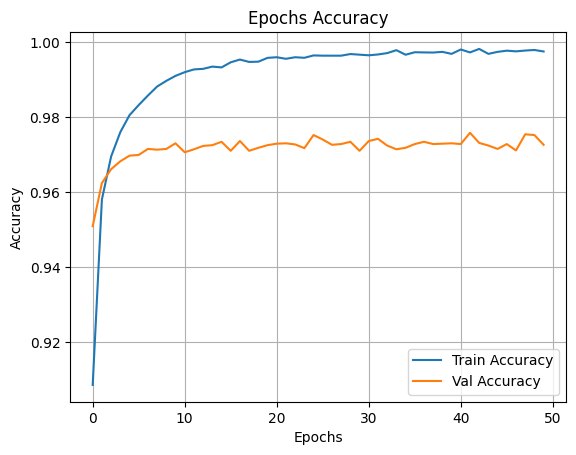

In [16]:
# Epochs Accuracy

Accuracy = History.history['accuracy']
Val_Accuracy = History.history['val_accuracy']

# Graph Training and Validation Accuracy

plt.plot(Accuracy, label = 'Train Accuracy')
plt.plot(Val_Accuracy, label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Epochs Accuracy")
plt.legend()
plt.grid()
plt.show()

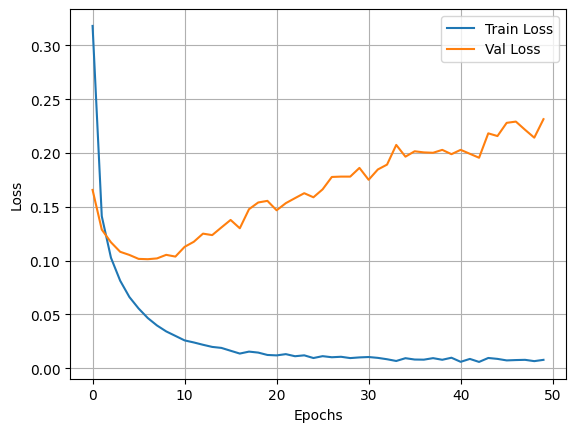

In [17]:
# Epochs Loss

Loss = History.history['loss']
Val_Loss = History.history['val_loss']

# Graph Training and Validation Loss

plt.plot(Loss, label = 'Train Loss')
plt.plot(Val_Loss, label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### 5. Model Prediction

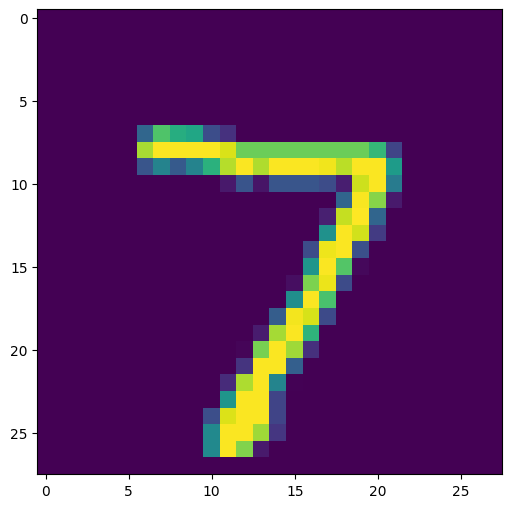

In [18]:
# First data point in Test Set

plt.figure(figsize = (6, 10))
plt.imshow(X_test[0])
plt.show()

In [19]:
# First element in Test Label

print(Y_test[0])

7


In [20]:
# Prediction

Pred = Model.predict(X_test)
print(Pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


In [21]:
print(Pred[0])

[7.0266108e-09 1.8899006e-11 2.2576526e-03 7.3281430e-02 2.1654171e-16
 1.0578560e-07 1.5772341e-23 1.0000000e+00 4.0818270e-07 5.6794737e-02]


In [22]:
# Converting Prediction Probabilities to Class Label

Label_First_Test_Image = np.argmax(Pred[0])
print(Label_First_Test_Image)

7


In [23]:
# Converting Prediction Probabilities to Class Label for all Test Data Points

Pred_Labels = [np.argmax(i) for i in Pred]
print(Pred_Labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 4, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 5, 5, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 5, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 5, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 2, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 5, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
# Confusion Matrix

Conf_Matrix = confusion_matrix(Y_test, Pred_Labels)

print("Confusion Matrix: \n", Conf_Matrix)

Confusion Matrix: 
 tf.Tensor(
[[ 967    0    2    0    3    0    3    2    2    1]
 [   1 1122    2    2    0    1    3    1    3    0]
 [   7   20  980    6    2    1    2    8    6    0]
 [   1    1    9  986    0    2    1    4    4    2]
 [   1    1    5    1  958    2    5    2    1    6]
 [   8    0    0   20    1  853    5    1    2    2]
 [   7    2    1    1    5  107  833    0    2    0]
 [   0    6   12   14    0    0    0  989    2    5]
 [   8    2    4   19    5   24    4    5  899    4]
 [   3    3    0    9   11   10    1   13    1  958]], shape=(10, 10), dtype=int32)


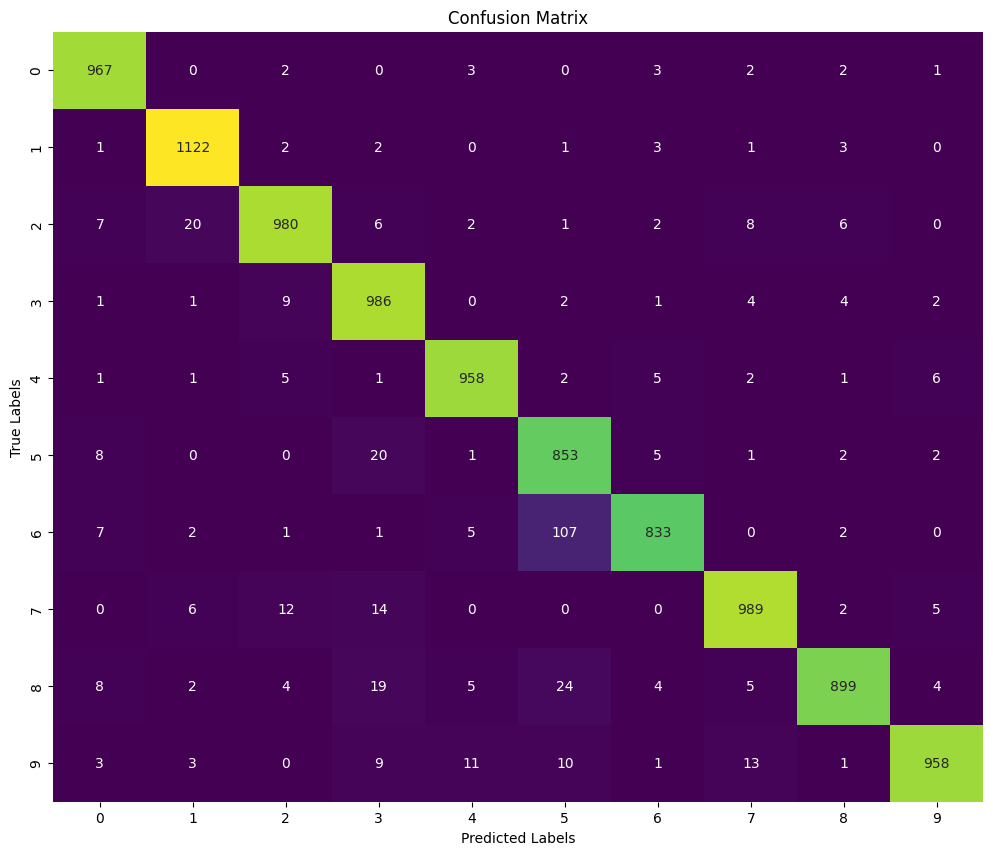

In [25]:
# Display Confusion Matrix

plt.figure(figsize = (12, 10))
sns.heatmap(Conf_Matrix, annot = True, fmt = 'd', cmap = 'viridis', cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### 6. Evaluate Model on Test Data

Path of the Image to be predicted: /content/MNIST_Random_Digit2.png


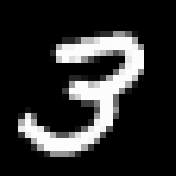

In [34]:
# Predicting Random Image

Random_Image_Path = input('Path of the Image to be predicted: ')
Image = cv2.imread(Random_Image_Path)

cv2_imshow(Image)

In [35]:
Grayscale = cv2.cvtColor(Image, cv2.COLOR_RGB2GRAY)

In [36]:
Random_Image_Resize = cv2.resize(Grayscale, (28, 28))

In [37]:
Random_Image_Resize = Random_Image_Resize / 255

In [38]:
Random_Image_Reshaped = np.reshape(Random_Image_Resize, [1, 28, 28])

In [39]:
Prediction = Model.predict(Random_Image_Reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [40]:
Pred_Label = np.argmax(Prediction)

In [41]:
print('The Handwritten Digit is recognised as: ', Pred_Label)

The Handwritten Digit is recognised as:  3
